In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_339524e45d8c4ca5b34d613d0c24c364 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='****',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_339524e45d8c4ca5b34d613d0c24c364.get_object(Bucket='sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',Key='NYC_311_Dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BROOKLYN,BROOKLYN,2015-11-23T10:29:49.000,DOOR/WINDOW,2015-11-07T10:16:55.000,397 1 STREET,11215.0,40.672571,RESIDENTIAL BUILDING,-73.979307,The Department of Housing Preservation and Dev...,Closed,1 STREET,31929828
1,ADDRESS,MANHATTAN,NEW YORK,2016-01-31T11:50:51.000,DOOR/WINDOW,2015-11-07T18:50:53.000,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929829
2,ADDRESS,MANHATTAN,NEW YORK,2015-11-20T09:11:31.000,DOOR/WINDOW,2015-11-07T23:09:57.000,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929830
3,ADDRESS,BROOKLYN,BROOKLYN,2015-11-16T12:25:46.000,DOOR/WINDOW,2015-11-07T14:05:52.000,1555 NOSTRAND AVENUE,11226.0,40.648298,RESIDENTIAL BUILDING,-73.949293,The Department of Housing Preservation and Dev...,Closed,NOSTRAND AVENUE,31929831
4,ADDRESS,BRONX,BRONX,2015-12-03T09:38:12.000,DOOR/WINDOW,2015-11-06T13:02:50.000,1808 MULFORD AVENUE,10461.0,40.847490,RESIDENTIAL BUILDING,-73.835112,The Department of Housing Preservation and Dev...,Closed,MULFORD AVENUE,31929832


In [3]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': '****',
    'IBM_API_KEY_ID': '****',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',
    'FILE': 'NYC_311_Dataset.csv'
}


In [4]:
# Hello and welcome to my notebook.
# The aim of my work here is to anwser the following question: "What is Complaint Type that the Department of Housing Preservation and Development of New York City should address first ?"

# We can fist have a look on the dimensions of the provided dataset.
df_data_1.shape
# The dataset has 5563637 rows and 15 columns.

# We can also see how the dataset looks like with the head() merthod.
df_data_1.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BROOKLYN,BROOKLYN,2015-11-23T10:29:49.000,DOOR/WINDOW,2015-11-07T10:16:55.000,397 1 STREET,11215.0,40.672571,RESIDENTIAL BUILDING,-73.979307,The Department of Housing Preservation and Dev...,Closed,1 STREET,31929828
1,ADDRESS,MANHATTAN,NEW YORK,2016-01-31T11:50:51.000,DOOR/WINDOW,2015-11-07T18:50:53.000,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929829
2,ADDRESS,MANHATTAN,NEW YORK,2015-11-20T09:11:31.000,DOOR/WINDOW,2015-11-07T23:09:57.000,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929830
3,ADDRESS,BROOKLYN,BROOKLYN,2015-11-16T12:25:46.000,DOOR/WINDOW,2015-11-07T14:05:52.000,1555 NOSTRAND AVENUE,11226.0,40.648298,RESIDENTIAL BUILDING,-73.949293,The Department of Housing Preservation and Dev...,Closed,NOSTRAND AVENUE,31929831
4,ADDRESS,BRONX,BRONX,2015-12-03T09:38:12.000,DOOR/WINDOW,2015-11-06T13:02:50.000,1808 MULFORD AVENUE,10461.0,40.847490,RESIDENTIAL BUILDING,-73.835112,The Department of Housing Preservation and Dev...,Closed,MULFORD AVENUE,31929832


In [5]:
# We are interested in the complaint types feature.
# The column with the feature is called "complaint_type".
# df_data_1["complaint_type"]

In [6]:
# We can then use the value_counts() method on the "complaint_type" column.
df_data_1["complaint_type"].value_counts()

# I decided to store the outcome in a new pandas Series.
df_data_2 = df_data_1["complaint_type"].value_counts()

# This new object as 22 rows.
print(df_data_2)

# A first look at this object is showing us that Heat/Hot Water seems to be the main complaint but this pandas Series has few features with high ressemblance.

HEAT/HOT WATER            1060058
HEATING                    887869
PLUMBING                   675186
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       392554
PAINT - PLASTER            361258
PAINT/PLASTER              312734
ELECTRIC                   290100
NONCONST                   260890
DOOR/WINDOW                180612
WATER LEAK                 168881
GENERAL                    132666
FLOORING/STAIRS            123426
APPLIANCE                  102237
HPD Literature Request      52657
SAFETY                      44395
OUTSIDE BUILDING             6542
ELEVATOR                     5598
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64


In [7]:
# I decided to merge few raws in a new pandas Series.
# For example : "PLUMBING" and "WATER LEAK" are grouped in a raw called "PLUMBING".
# I did not group "HEATING" with "HEAT/HOT WATER" as I considered that heating could mainly be electric or gas.
# These new groups are :
#   HEAT and HOT WATER
#   HEATING
#   PLUMBING
#   GENERAL CONSTRUCTION
#   UNSANITARY CONDITION
#   PAINT and PLASTER
#   ELECTRIC
#   GENERAL
#   NON CONSTRUCTION
#   DOOR and WINDOW
#   FLOORING and STAIRS
#   APPLIANCE
#   OTHERS (for types of complaint with a small amount of 311 calls)


# Here is the definition of this new object
df_data_3 = pd.DataFrame.from_records([{
    "HEAT/HOT WATER" : df_data_2["HEAT/HOT WATER"],
    "HEATING" : df_data_2["HEATING"],
    "PLUMBING" : df_data_2["PLUMBING"] + df_data_2["WATER LEAK"],
    "GENERAL CONSTRUCTION" : df_data_2["GENERAL CONSTRUCTION"] + df_data_2["CONSTRUCTION"],
    "UNSANITARY CONDITION" : df_data_2["UNSANITARY CONDITION"],
    "PAINT/PLASTER" : df_data_2["PAINT - PLASTER"] + df_data_2["PAINT/PLASTER"],
    "ELECTRIC" : df_data_2["ELECTRIC"],
    "NON CONSTRUCTION" : df_data_2["NONCONST"],
    "GENERAL" : df_data_2["GENERAL"],
    "APPLIANCE" : df_data_2["APPLIANCE"],
    "FLOORING/STAIRS" : df_data_2["FLOORING/STAIRS"],
    "DOOR/WINDOW" : df_data_2["DOOR/WINDOW"],
    "OTHERS" : df_data_2["HPD Literature Request"] + df_data_2["SAFETY"] + df_data_2["OUTSIDE BUILDING"] + df_data_2["ELEVATOR"] + df_data_2["AGENCY"] + df_data_2["VACANT APARTMENT"]
    }], index = ["Number of 311 calls"])

# I transpose this object and check its shape.
df_data_3 = df_data_3.T
df_data_3.shape

(13, 1)

In [8]:
# I then sort the values in ascending order.
df_data_3.sort_values(by='Number of 311 calls', ascending=True, inplace=True)

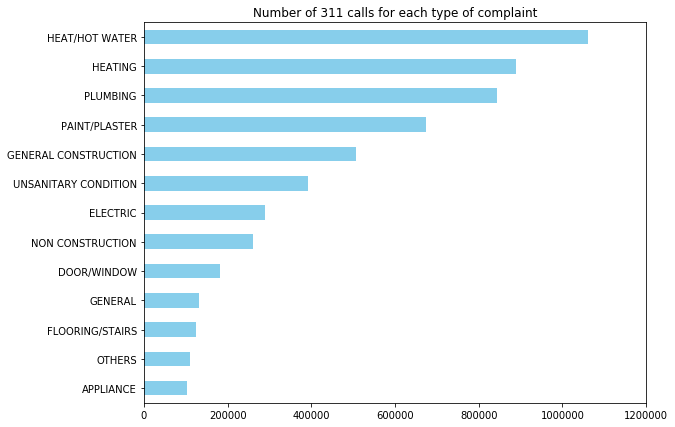

In [13]:
# I plot an horizontal bar diagram.
df_data_3.plot(kind = 'barh', figsize = (9,7), 
               title = "Number of 311 calls for each type of complaint", 
               sort_columns = True, 
               color = "skyblue",
               legend = False,
               xticks = (0,200000,400000,600000,800000,1000000,1200000)
               );

In [10]:
# The diagram above clearly shows that the Complaint Type that the Department of Housing Preservation and Development of New York City should address first is the Heat/Hot Water.

Requirement not upgraded as not directly required: wordcloud in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pillow->wordcloud)


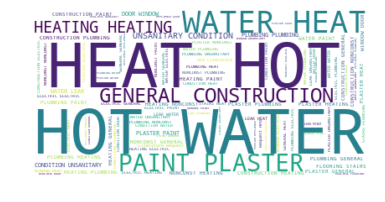

In [14]:
# I also tried to implement a wordcloud.
# I don't know if it will work on this platform as wordcloud needs to be installed on IBM Watson Studio before importing it.

# Installing wordCloud
!pip install wordcloud


from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt


stopwords = set(STOPWORDS)
complaint_types = WordCloud(background_color='white', max_words=500, random_state=1, stopwords=stopwords).generate(' '.join(df_data_1["complaint_type"]))
plt.imshow(complaint_types, interpolation='bilinear')
plt.axis('off')
plt.show()

# This wordcloud is also showing that the Complaint Type that the Department of Housing Preservation and Development of New York City should address first is the Heat/Hot Water.

In [12]:
# Thanks for reading.